What is a Forest Plot?
- A forest plot is a graphical representation of effect sizes (such as odds ratios, hazard ratios, or mean differences) along with their confidence intervals. 

It's commonly used in:
- Meta-analysis to summarize multiple studies.
- Medical research to show risk factors.
- Machine learning to visualize feature importance with uncertainty.

Key Components of a Forest Plot
- Effect Size (e.g., Odds Ratio) → Plotted as points.
- Confidence Intervals (CI) → Represented as horizontal lines.
- Reference Line (e.g., OR = 1) → A vertical line indicating no effect.
- Feature Labels → Display the studied variables.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import Logit
from sklearn.ensemble import RandomForestClassifier

In [4]:
# using a manually inputted small dataset

practice_data = pd.DataFrame({
    "Feature": ["Age", "BMI", "Hypertension", "Smoking", "Diabetes"],
    "Odds Ratio": [1.2, 1.5, 2.3, 1.8, 1.7],
    "Lower CI": [1.0, 1.2, 1.9, 1.5, 1.4],  # Lower bound of confidence interval
    "Upper CI": [1.4, 1.8, 2.7, 2.1, 2.0]   # Upper bound of confidence interval
})

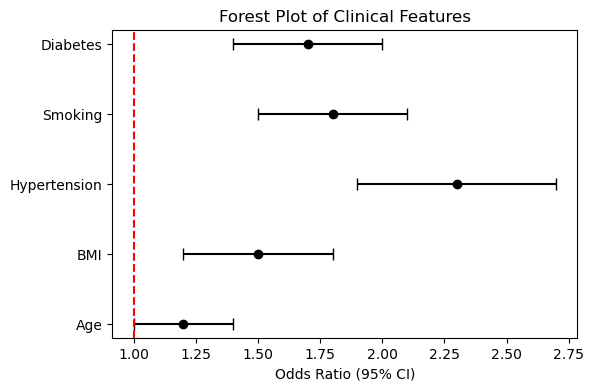

In [ ]:
#Set up the figure
fig, ax = plt.subplots(figsize=(6,4))

#Plot error bars (CI)
ax.errorbar(data["Odds Ratio"], data.index, 
            xerr=[data["Odds Ratio"] - practice_data["Lower CI"], practice_data["Upper CI"] - practice_data["Odds Ratio"]], 
            fmt='o', color='black', capsize=4)

#Add a vertical reference line at OR = 1 (no effect)
ax.axvline(x=1, linestyle="--", color="red")

#Set labels and title
ax.set_yticks(range(len(data)))
ax.set_yticklabels(data["Feature"])
ax.set_xlabel("Odds Ratio (95% CI)")
ax.set_title("Forest Plot of Clinical Features")

plt.show()


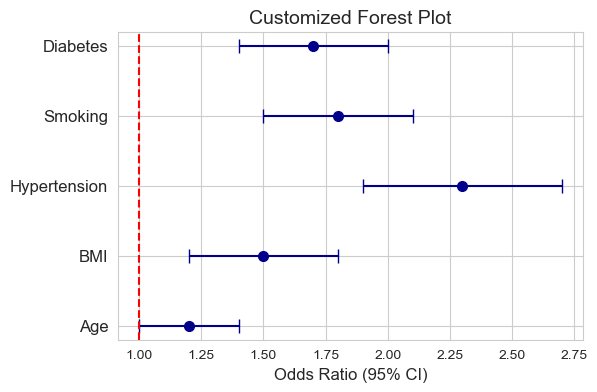

In [6]:
#Now cusotomise it using seaborn
plt.figure(figsize=(6,4))

# Customize error bars with Seaborn aesthetics
sns.set_style("whitegrid")
plt.errorbar(data["Odds Ratio"], data.index, 
             xerr=[data["Odds Ratio"] - data["Lower CI"], data["Upper CI"] - data["Odds Ratio"]], 
             fmt='o', color='darkblue', capsize=5, markersize=7)

plt.axvline(x=1, linestyle="--", color="red", linewidth=1.5)  # Reference line

# Labels
plt.yticks(range(len(data)), data["Feature"], fontsize=12)
plt.xlabel("Odds Ratio (95% CI)", fontsize=12)
plt.title("Customized Forest Plot", fontsize=14)

plt.show()

Using the sample data from the Random Forest I created to generate a Forest Plot of Feature Importance

In [16]:
df = pd.read_csv("synthetic_ph_dataset_300.csv")
X = df.iloc[: 0:300]
y = df.iloc[1, 8]
from sklearn.model_selection import train_test_split

X = df.drop('PH Diagnosis', axis=1)
y = df['PH Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict (X_test)
features = pd.DataFrame({
    "Feature": X_train.columns,  # Assign feature names
    "Importance": rf.feature_importances_  # Assign importances
})
importance_data = features.sort_values(by="Importance", ascending=False)
print(importance_data)

             Feature  Importance
5      Heart Disease    0.306091
0                Age    0.243782
7  Oxygen Saturation    0.144467
3        Systolic BP    0.119690
2                BMI    0.118457
6               COPD    0.026509
1                Sex    0.022547
4           Diabetes    0.018456


In [21]:
# Simulate confidence intervals using bootstrapping
n_bootstraps = 1000
rng = np.random.RandomState(42)
bootstrap_importances = np.zeros((n_bootstraps, len(importance_data)))

for i in range(n_bootstraps):
    indices = rng.choice(range(len(y_train)), size=len(y_train), replace=True)
    rf.fit(X_train.iloc[indices], y_train.iloc[indices])  # Use .iloc[]
    bootstrap_importances[i] = rf.feature_importances_

lower_bounds = np.percentile(bootstrap_importances, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_importances, 97.5, axis=0)


In [30]:
# Create a DataFrame
importance_data = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_,
    "Lower CI": lower_bounds,
    "Upper CI": upper_bounds})

# Sort features by importance
importance_data = importance_data.sort_values(by="Importance", ascending=False)
print(importance_data)

             Feature  Importance  Lower CI  Upper CI
0                Age    0.288403  0.214375  0.296863
5      Heart Disease    0.284917  0.226290  0.352219
7  Oxygen Saturation    0.125774  0.104198  0.175410
3        Systolic BP    0.124361  0.096127  0.156487
2                BMI    0.111096  0.100761  0.161837
4           Diabetes    0.028091  0.012094  0.032896
6               COPD    0.019158  0.015353  0.044582
1                Sex    0.018198  0.013838  0.033297


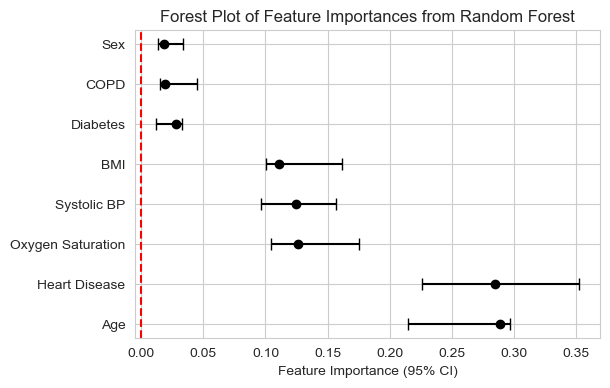

In [31]:
# Forest Plot
plt.figure(figsize=(6, 4))
plt.errorbar(importance_data["Importance"], importance_data["Feature"], 
             xerr=[importance_data["Importance"] - importance_data["Lower CI"], 
                   importance_data["Upper CI"] - importance_data["Importance"]],
             fmt='o', color='black', capsize=4)

# Add a vertical reference line at 0 (neutral effect)
plt.axvline(x=0, linestyle="--", color="red")

# Labels
plt.xlabel("Feature Importance (95% CI)")
plt.title("Forest Plot of Feature Importances from Random Forest")

plt.show()